# 주의 사항
1. 이미지를 보고 문제에 요구하는 사항을 만족하여 코드를 작성하세요! (최대한 비슷하게 하셔도 좋아요! 모양을 비슷하게 나오게 하는 것을 목표로!)
2. 이미지와 코드를 창 분할해서 이미지를 보면서 코드 작성!
3. 각 문제는 어떤 라이브러리로 작성해야되는지 적혀져있으니 확인 필수!
4. 범례 한글 적용을 위해 각 os에 맞게 코드 실행 필수!
5. 남겨진 주석은 참고용이므로 굳이 주석을 따를 필요는 없습니다!
6. 색깔, 범례, 100% 일치할 필요 없습니다. 모양이 같으면 됩니다!
7. 그래프를 그렸다면 나름의 그래프 해석도 한번 해보세요!!

In [3]:
import pandas as pd

df = pd.read_csv('../data/pokemon2.csv')

In [4]:
# 범례 한글 적용

import matplotlib.pyplot as plt

#plt.rcParams['font.family'] = 'Malgun Gothic' # For Windows
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
%matplotlib inline

In [129]:
df.columns

#df['base_total']

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary', 'col_legendary'],
      dtype='object')

## 문제 1: 포켓몬 타입 분포 (Bar Plot)
문제 설명: 포켓몬 데이터셋의 type1 컬럼을 이용하여, 각 포켓몬 주요 타입별 포켓몬 수를 나타내는 막대 그래프를 그리세요. 타입별로 몇 마리의 포켓몬이 있는지 한눈에 비교할 수 있도록 시각화합니다.  
Matplotlib 라이브러리를 사용하여 구현하세요.

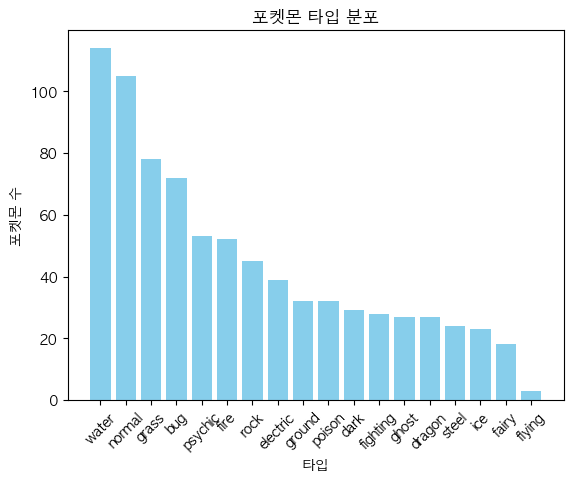

<Figure size 1000x100 with 0 Axes>

In [5]:
# 1. type1별 포켓몬 수 계산
# - 각 타입별 개수 세기 : value_counts()
cnt = df['type1'].value_counts()

# - 보기 좋게 개수 내림차순 정렬 : sort_values(ascending=False)
sorted_cnt = cnt.sort_values(ascending=False)
sorted_cnt

# 2. 막대 그래프 그리기
# - 타입명을 x축, 포켓몬 수를 y축으로 막대 그리기(skyblue)
plt.bar(sorted_cnt.index, sorted_cnt, color = 'skyblue')

# 3. 그래프 제목과 축 레이블 설정
# - 그래프 제목
# - x축 레이블
# - y축 레이블
plt.title("포켓몬 타입 분포")
plt.xlabel("타입")
plt.ylabel("포켓몬 수")

# 4. x축 눈금 라벨 각도 조정 (라벨 겹침 방지)
# - 타입 이름이 많으므로 45도 회전|
plt.xticks(rotation=45)

plt.figure(figsize=(10,1))
plt.show()

## 문제 2: 공격 vs 방어 상관관계 (Scatter Plot)
문제 설명: 포켓몬의 **공격력(attack)과 방어력(defense) 사이의 관계를 산점도**로 시각화하세요. **Seaborn 라이브러리의 scatterplot**을 사용하며, 전설 포켓몬과 일반 포켓몬이 서로 구분되도록 점의 색상을 다르게 표시합니다 (`is_legendary` 값을 활용). 이를 통해 공격력과 방어력 간 상관관계와 전설 포켓몬들의 분포 특성을 관찰합니다.

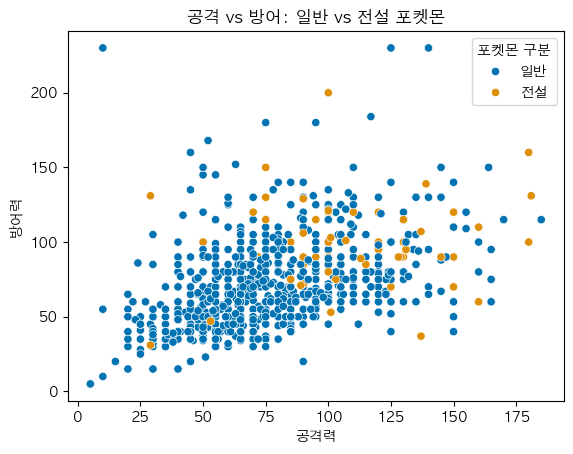

In [57]:
import seaborn as sns

# 1. 전설 여부를 나타내는 새로운 범주형 컬럼 추가 (시각화용)
# - 'is_legendary'가 0이면 '일반', 1이면 '전설' 문자열로 변환, map
df['col_legendary'] = df['is_legendary'].map({0:'일반', 1:'전설'})
df['col_legendary']
# 2. 산점도 그리기 (공격력 vs 방어력)
# hue : 색상 분류하는 기준! (범례도 자동 생성)
# style : 마커 모양 분류 기준
# markers : 마커 모양
# palette : 색상 조합
# alpha : 투명도(0 완전 투명, 1 불투명)
sns.scatterplot(x='attack', y='defense', data=df, hue='col_legendary', palette='colorblind')

# 3. 그래프 제목과 축 레이블 설정
# - 그래프 제목
# - x축 레이블
# - y축 레이블
plt.title("공격 vs 방어: 일반 vs 전설 포켓몬")
plt.xlabel('공격력')
plt.ylabel('방어력')

# 4. 범례 제목 설정 (plt.legend(title=' '))
plt.legend(title='포켓몬 구분')


## 문제 3: 전설 vs 일반 포켓몬 능력치 분포 비교 (Histogram)
문제 설명: 전설 포켓몬과 일반 포켓몬의 종합 능력치(base_total) 분포를 비교하는 히스토그램을 그리세요. 두 그룹의 분포를 한 그래프에 겹쳐서 표시하여, 전설 포켓몬이 일반 포켓몬에 비해 능력치 분포에 어떤 차이가 있는지 시각적으로 확인합니다.  
Matplotlib 라이브러리를 사용하여 구현하세요.

In [14]:
import numpy as np

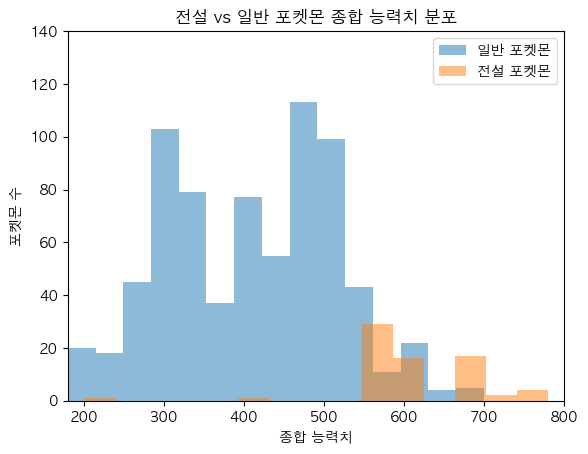

In [36]:
# 1. 전설 포켓몬과 일반 포켓몬으로 데이터 분리
# - 전설 포켓몬들의 종합 능력치 시리즈
legendary_base =df.loc[df['is_legendary']==1,'base_total']
# - 일반 포켓몬들의 종합 능력치 시리즈
regular_base =df.loc[df['is_legendary']==0,'base_total']

# 2. 히스토그램 설정
plt.hist(regular_base, bins=15, label='일반 포켓몬', alpha=0.5)
plt.hist(legendary_base, bins=15, label='전설 포켓몬', alpha=0.5)

# - 능력치 최소 180부터 최대 800까지 40 간격으로 구간 설정
plt.axis([180,800,0,140])
# plt.xticks(np.arange(200,800,100))

# 3. 두 그룹의 히스토그램을 투명도 있게 겹쳐 그리기

# 4. 그래프 제목과 축 레이블, 범례 설정
plt.title('전설 vs 일반 포켓몬 종합 능력치 분포')
plt.xlabel('종합 능력치')
plt.ylabel('포켓몬 수')
plt.legend()


## 문제 4: 세대별 평균 능력치 추이 (Line Plot)
문제 설명: 포켓몬 세대(generation)별 평균 종합 능력치(base_total)의 변화를 선 그래프로 나타내세요.</br> 세대를 1세대부터 7세대까지 x축에 두고, </br>해당 세대에 속한 포켓몬들의 평균 종합 능력치가 y축으로 오도록 해서 </br>세대 간 능력치 변화 추이를 파악합니다.  </br>
Matplotlib 라이브러리를 사용하여 구현하세요.

Object `??` not found.


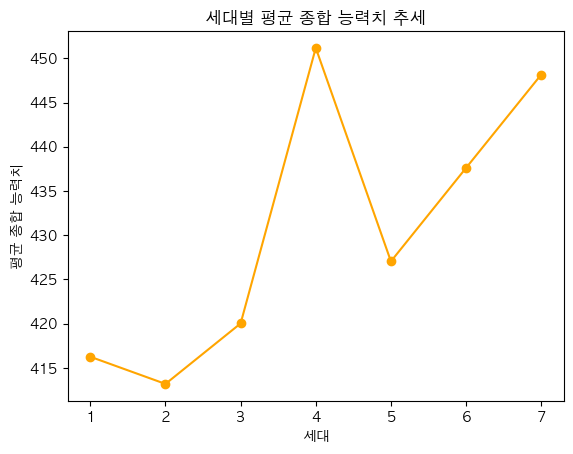

In [102]:
# 1. 세대별 평균 종합 능력치 계산 - df.groupby(그룹핑할 기준)[그룹핑할 데이터].mean() / median()
# - generation 컬럼으로 그룹화하여 base_total 평균 계산
grouped_base = df.groupby('generation')['base_total'].mean()

# 2. 세대 값과 평균값 준비
# - 세대 번호 (1, 2, ..., 7)
gen_num = grouped_base.index
# - 각 세대별 평균 base_total 값
grouped_base

# 3. 선 그래프 그리기
# - 세대별 평균을 선으로 연결 (포인트 표시)
plt.plot(gen_num, grouped_base, marker='o', color='orange')

# 4. 그래프 제목과 축 레이블 설정
plt.title('세대별 평균 종합 능력치 추세')
plt.xlabel('세대')
plt.ylabel('평균 종합 능력치')

# 5. x축 눈금 세대를 정수 단위로 표시
# - 1~7 정수값 그대로 눈금 표시
????


## 문제 5: 세대별 능력치 분포 비교 (Box Plot)
문제 설명: 세대별 포켓몬들의 종합 능력치 분포를 Boxplot으로 시각화하세요.</br> x축에 세대(generation)를, </br>y축에 종합 능력치(base_total)를 놓고, </br>세대마다 포켓몬 능력치의 분포(중앙값, 사분위 범위 등)를 비교합니다.

 </br>각 세대별로 포켓몬 능력치가 어느 범위에 분포하는지,</br> 그리고 세대 간 분포의 차이가 있는지 확인해보세요.  </br>
Seaborn 라이브러리를 사용하여 구현합니다.

/var/folders/mt/b5bzczgn14s85rhfsvnlr33h0000gn/T/ipykernel_77785/4115797976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='generation', y='base_total', data=df, palette='pastel')


Text(0, 0.5, '종합 능력치')

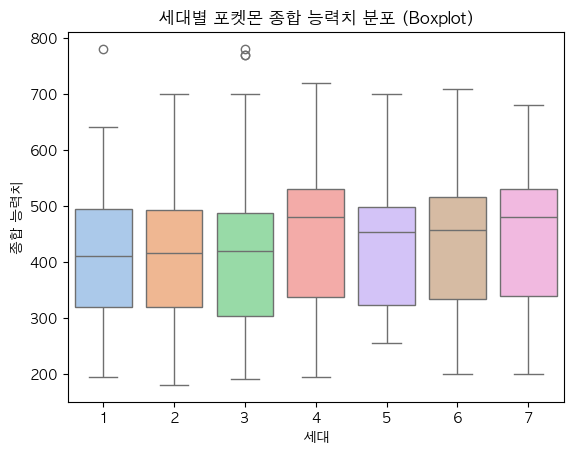

In [103]:
# 1. Boxplot 그리기 (세대별 base_total 분포)
sns.boxplot(x='generation', y='base_total', data=df, palette='pastel')

# 2. 그래프 제목과 축 레이블 설정
plt.title('세대별 포켓몬 종합 능력치 분포 (Boxplot)')
plt.xlabel('세대')
plt.ylabel('종합 능력치')


## 문제 6: 타입별 스피드 분포 (Violin Plot)
문제 설명: 포켓몬의 주 타입별 스피드 분포를 Violin Plot으로 나타내세요. </br>각 포켓몬의 주 타입(type1)을 그룹으로 구분하여,</br> 해당 그룹 포켓몬들의 스피드(speed) 분포가 어떻게 나타나는지 비교합니다. 

Seaborn의 violinplot을 사용하여 구현하며,</br>
 Violin Plot의 모양을 통해 각 타입의 스피드 분포 형태(중심, 퍼짐 정도 등)를 관찰해보세요.

/var/folders/mt/b5bzczgn14s85rhfsvnlr33h0000gn/T/ipykernel_77785/1067541287.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='speed', y='type1', data = df, palette='bright', order=v_order)


Text(0, 0.5, '타입')

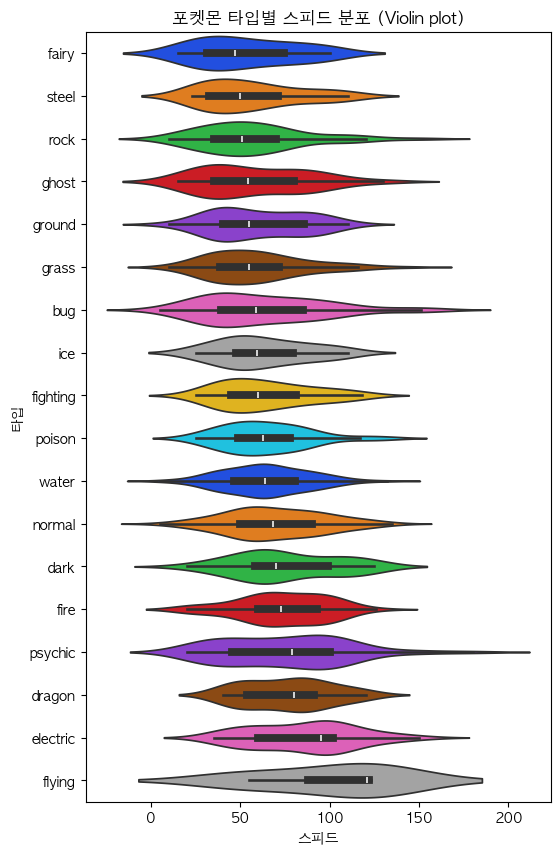

In [ ]:
plt.figure(figsize=(6,10))
# 1. 타입별 스피드 분포를 나태내는 Violinplot 그리기
sns.violinplot(x='speed', y='type1', data = df, palette='bright', order=v_order)

# 2. 'type1' 값을 'speed' 중앙값 기준으로 정렬하여 순서 지정 (분포 비교를 더 쉽게)
# df.groupby(그룹핑할 녀석)[그룹핑한 값].평균?/중앙값?.sort_values()
# - 각 타입별 speed 중앙값으로 정렬된 타입 순서
#df.groupby('speed')['type1'].median().sort_values()
v_order = df.groupby('type1')['speed'].median().sort_values().index


# 3. 그래프 제목과 축 레이블 설정
plt.title('포켓몬 타입별 스피드 분포 (Violin plot)')
plt.xlabel('스피드')
plt.ylabel('타입')

In [155]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary', 'col_legendary'],
      dtype='object')

In [163]:
df['sp_attack']

0       65
1       80
2      122
3       60
4       80
      ... 
796    107
797     59
798     97
799    127
800    130
Name: sp_attack, Length: 801, dtype: int64

## 문제 7: 능력치 상관관계 히트맵 (Heatmap)
문제 설명: 포켓몬의 주요 능력치 간 상관관계를 히트맵(Heatmap)으로 시각화하세요. 

예를 들어 HP, Attack, Defense, Special Attack, Special Defense, Speed 등의 기본 스탯들 사이의 상관계수 행렬을 구한 뒤, </br>이를 Heatmap으로 표시합니다. </br>가능하다면 몸무게(Weight)나 키(Height) 같은 물리적 특성과의 상관관계도 함께 포함해보세요. 

Seaborn 라이브러리를 사용하여 히트맵을 그리고, 각 셀에 상관계수 값을 숫자로 표시합니다.

<Figure size 1000x800 with 0 Axes>

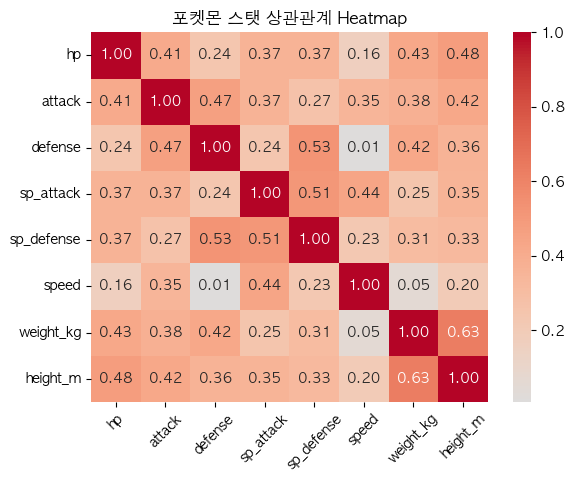

<Figure size 1000x800 with 0 Axes>

In [168]:
# 1. 상관관계를 볼 특성 선택 (HP, Attack, Defense, Sp.Atk, Sp.Def, Speed, Weight, Height 등)
cols = pd.Series(['HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed', 'Weight', 'Height'])
lower_cols = cols.str.lower()
lower_cols


lower_cols = ['hp', 'attack', 'defense', 'speed']
lower_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'height_m']

# 2. 선택한 특성들의 상관계수 행렬 계산
# - stats 리스트에 해당하는 컬럼들 간의 피어슨 상관계수 계산 df[stats].corr()
corr_df = df[lower_cols].corr()


# 3. 히트맵 그리기
# - 상관계수를 소수 둘째자리까지 표시 - sns.heatmap()
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm', center=0)

# 3. 그래프 제목과 축 레이블 설정
# - x축 레이블 각도 조정
# - y축 레이블은 수평 표시
plt.title('포켓몬 스탯 상관관계 Heatmap')
plt.xticks(rotation=45)
plt.figure(figsize=(10,8))


## 문제 8: 키와 몸무게의 관계 (Plotly Scatter Plot)
문제 설명: Plotly 라이브러리를 사용하여 포켓몬의 키(height_m)와 몸무게(weight_kg) 관계를 나타내는 인터랙티브 산점도를 그리세요. 

일반 포켓몬과 전설 포켓몬이 구분되도록 점 색상을 다르게 설정하고, </br>각 데이터 점에 마우스를 올리면 해당 포켓몬의 이름이 표시되도록 구현합니다. 

Plotly의 scatter(혹은 px.scatter) 기능을 활용하여 대화형으로 확대/축소 및 툴팁 확인이 가능한 산점도를 만들어 보세요.

In [10]:
# 1. 전설 여부를 나타내는 범주형 라벨 컬럼 추가 (Normal vs Legendary)
df['LegendaryStatus'] = df['is_legendary'].map({0:'Normal', 1:'Legendary'})

# 2. Plotly 익스프레스의 scatter 함수로 산점도 객체 생성
weight = pd.Series(df['weight_kg'])
height = pd.Series(df['height_m'])

import plotly.express as px

fig = px.scatter(
    data_frame = df,
    x = 'height_m',
    y = 'weight_kg',
    title = 'Pokemon Height vs Weight (Interactive Scatter)',
    labels={'height_m':'Height (m)', 'weight_kg':'Weight (kg)'},
    width = 1500,
    height = 400,
    color='LegendaryStatus'
)


# 3. 산점도 그래프 보여주기 (주피터 노트북 등에서 인터랙티브로 표시)
fig.show()


In [43]:
asd = 'dfhjksd'


print(asd.isdigit)
print(asd.isdigit())

<built-in method isdigit of str object at 0x1388320f0>
False
